<a href="https://colab.research.google.com/github/HyeeSeong/2025-1_CV_Hyeseong/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW#2
소프트웨어학과 2020039036 노혜성


In [77]:
import cv2    # OpenCV를 사용하기 위해 cv2 import

import numpy as np   # 넘파이 사용
import matplotlib.pyplot as plt   # matplotlib : 시각화라이브러리

from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

In [78]:
# OpenCV 버전을 확인
print("OpenCV version:")
print(cv2.__version__)

OpenCV version:
4.11.0


## HW# 2-1
Fig3.9(a) 영상에 대해 오른쪽과 같은 결과가
나오도록 여러가지 경우에 대해 실험하고, 결과
를 분석해보세요. 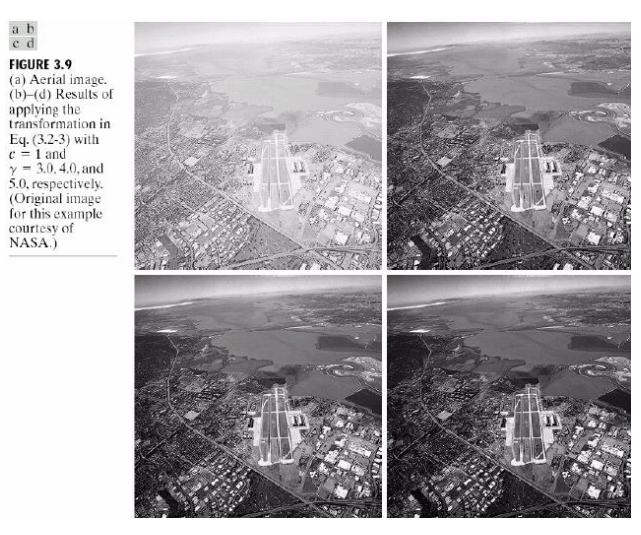

명암 대비가 낮고 전체적으로 밝게 흐려진 항공 영상을 대상으로 Power Law Transformation (감마 변환)을 하였다. 실험에서는 감마 값으로 3.0, 4.0, 5.0을 사용하였으며,(상수 c 값은 1로 고정).

결과적으로, 감마 값이 커질수록 어두운 영역의 부분은 더욱 어두워지고, 밝은 부분은 상대적으로 덜 변환되어 전체 영상의 대비가 향상되는 효과를 보였다. 특히, 하늘이나 지면의 밝은 영역이 어두워지면서 세부 구조가 더 뚜렷하게 보인다.

이는 감마 보정이 시각적 정보 전달을 개선할 수 있음을 보여준다.

In [79]:
# 실험 영상 다운로드

!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif"

--2025-04-13 12:41:05--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.008s  

2025-04-13 12:41:05 (68.7 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [589115/589115]



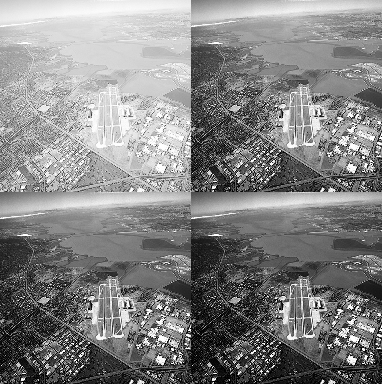

In [80]:
# 이미지 로드 및 사이즈 조정
img = cv2.imread('/content/Fig0309(a)(washed_out_aerial_image).tif')
img = cv2.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

# 감마 함수
def gamma(f, gamma=1.0):
    f1 = f / 255.0
    return np.uint8(255 * (f1 ** gamma))

# 변환 이미지들 생성
gamma3 = gamma(img, 3.0)
gamma4 = gamma(img, 4.0)
gamma5 = gamma(img, 5.0)

# 2x2 배열 만들기
top_row = np.hstack((img, gamma3))
bottom_row = np.hstack((gamma4, gamma5))
grid_2x2 = np.vstack((top_row, bottom_row))

# 이미지 표시
cv2_imshow(grid_2x2)

## HW# 2-2
Fig3.10(a) 영상에 대해 오른쪽과 같은 결과
가 나오도록 여러가지 경우에 대해 실험하고,
결과를 분석해보세요.
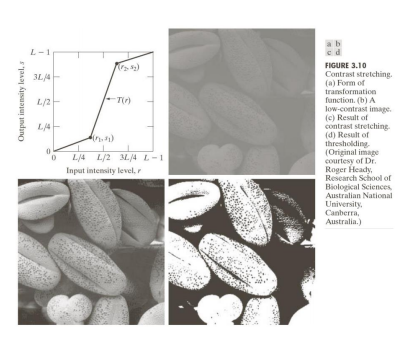

HW#2-2 에서는 실험 영상에 Piecewise_Linear Transformation 기법 중에서 Contrast stretching 과 Thresholding 기법을 적용하였다.

Contrast stretching 을 통해 영상 내 중간 밝기 영역을 중심으로 밝기 범위를 확장하였다. 이 처리를 통해 원본 영상에서는 잘 보이지 않던 특히 객체와 배경 간의 대비가 크게 증가하여 시각적으로 훨씬 선명한 결과를 얻을 수 있었다.

Thresholding을 적용하여 영상의 픽셀 값을 이진화하였다. 이 방법은 객체와 배경을 더욱 명확하게 구분할 수 있도록 도와주었지만, 그 과정에서 꽃가루의 표면 무늬와 같은 세부 정보는 손실되었다.



In [81]:
# 실험 영상 다운로드

!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif"

--2025-04-13 12:41:06--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791311 (773K) [image/tiff]
Saving to: ‘Fig0310(b)(washed_out_pollen_image).tif’

Fig0310(b)(washed_o 100%[===================>] 772.76K  --.-KB/s    in 0.01s   

2025-04-13 12:41:06 (75.7 MB/s) - ‘Fig0310(b)(washed_out_pollen_image).tif’ saved [791311/791311]



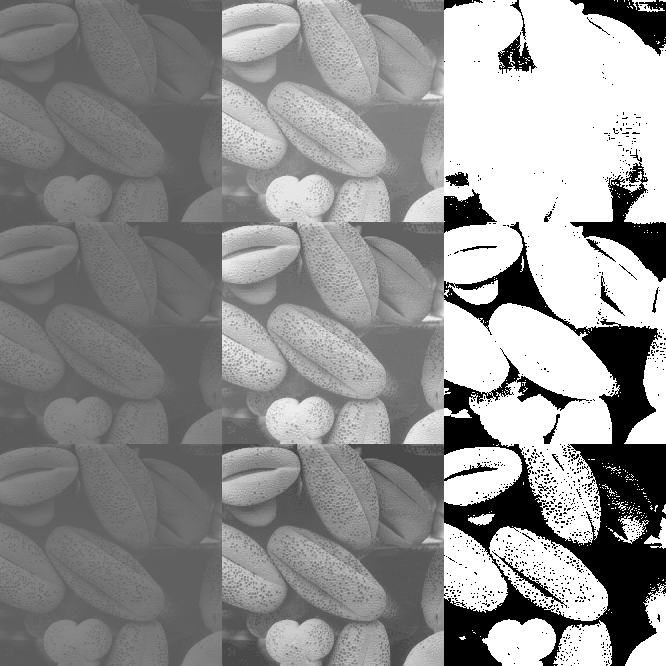

In [82]:
# 이미지 불러오기 (흑백 + 리사이즈)
img = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

# Contrast Stretching 함수
def contrast_stretching(img, r1, s1, r2, s2):
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i, j]
            if (r < r1):
                output[i, j] = int((s1 / r1) * r)
            elif (r1 <= r <= r2):
                output[i, j] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
            else:
                output[i, j] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)
    return output

# 다양한 설정 조합 (r1, s1, r2, s2)
settings = [
    (60, 20, 130, 230),
    (70, 30, 140, 255),
    (80, 40, 150, 250) ]

# 결과를 담을 리스트
all_rows = []

# 다양한 설정을 통해 스트레칭 및 이진화 수행
for r1, s1, r2, s2 in settings:
    stretched = contrast_stretching(img, r1, s1, r2, s2) # 스트레칭
    _, thresholded = cv2.threshold(stretched, 127, 255, cv2.THRESH_BINARY) # 이진화
    row = np.hstack((img, stretched, thresholded))  # 한 줄: 원본 → 스트레칭 → 이진화
    all_rows.append(row)


# 수직 방향으로 붙여 출력 (결과 시각화)
result = np.vstack(all_rows)
cv2_imshow(result)


##HW# 2-3

임의의 영상을 입력 받아 아래와 같은 마스크를 사용하여 컨볼루션 하고, 그 결과를 분석해보세요

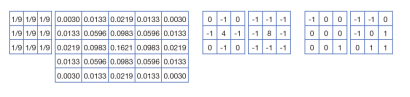

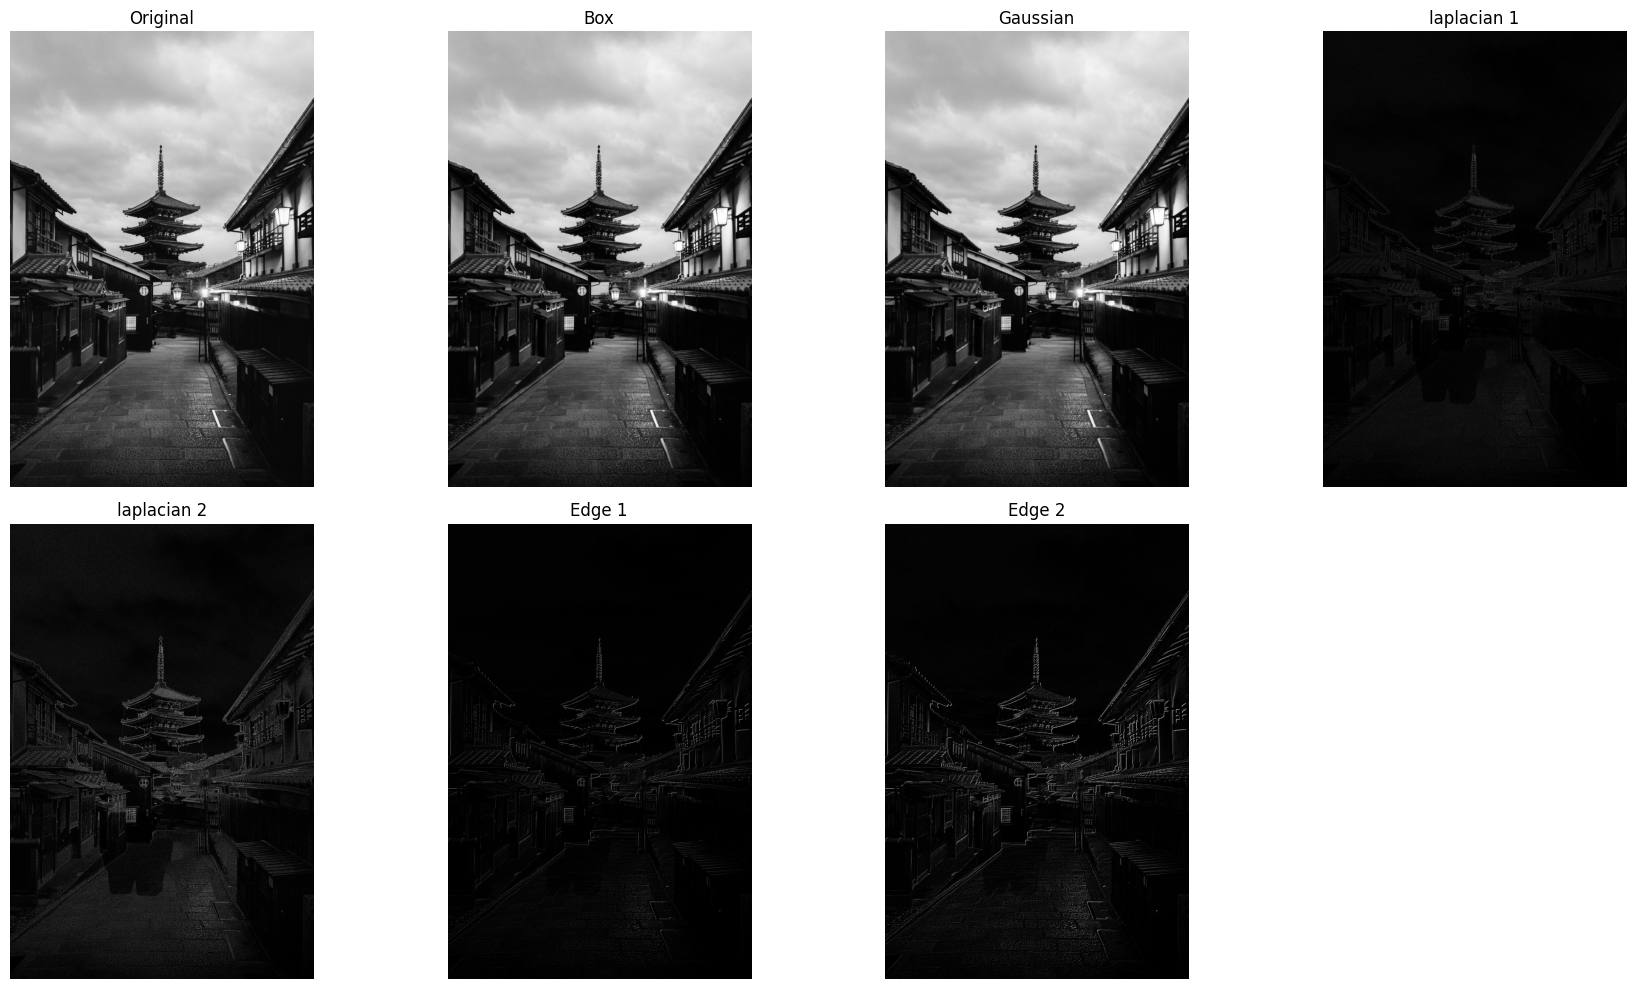

In [98]:
# 이미지 불러오기 (흑백)
img = cv2.imread('/content/hw23.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(0, 0), fx=0.75, fy=0.75)

# 마스크 정의

# 평균 필터 (box filter)
# 모든 계수가 양수이고 전체 합이1인 마스크 사용
# 영상의 노이즈를 제거하고, 부드럽게(blur) 만듬
box_kernel = np.ones((3, 3), dtype=np.float32) / 9.0

# 가우시안 필터 (Gaussian Filter)
# 평균 필터보다 주변 픽셀에 가중치가 적용되어 경계 흐림이 덜하다
# 결과적으로 부드러운 스무딩과 비교적 경계손상이 적다.
gaussian_kernel = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
], dtype=np.float32)

# 라플라시안 필터 (Laplacian Filter)
# 고주파 통과 필터로 경계 부분의 명암 비를 증가시키는 필터이다.
# laplacian_kernel1 은 4 방향의 이웃(상, 하, 좌, 우)만 고려하기 때문에 노이즈 민감도가 낮고 결과가 깔금 하지만 세밀도가 부족하다.
# laplacian_kernel2 은 모든 방향의 이웃을 사용하기 때문에 더 강력하게 엣지가 검출된다 하지만 노이즈에 민감해서 잡음까지 감지된다.
laplacian_kernel1 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

laplacian_kernel2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=np.float32)

# 엣지 필터
# 두 필터 모두 경계를 추출하는 컨볼류션 마스크이다.
# edge_kernel1 은 왼쪽 상단과 오른쪽 하단만 사용한다. 따라서 왼쪽 아래 대각선 방향의 경계만 추출된다.
# edge_kernel2 은 여러 방향의 경계를 추출해서 더 디테일한 엣지를 추출한다.
edge_kernel1 = np.array([
    [-1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
], dtype=np.float32)

edge_kernel2 = np.array([
    [-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]
], dtype=np.float32)

# 필터 리스트와 이름
kernels = [
    (box_kernel, "Box"),
    (gaussian_kernel, "Gaussian"),
    (laplacian_kernel1, "laplacian 1"),
    (laplacian_kernel2, "laplacian 2"),
    (edge_kernel1, "Edge 1"),
    (edge_kernel2, "Edge 2"),
]

# 결과 저장 및 시각화
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (kernel, name) in enumerate(kernels):
    filtered = cv2.filter2D(img, -1, kernel)
    plt.subplot(2, 4, i + 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


 ## HW# 2-4

 아래와 같은 영상에 대해서  45°, -45° 방향의 대각선 Edge를 검출하되, Sobel 연산자를 변형하여 적절한 마스크를 만들어 적용해보세요

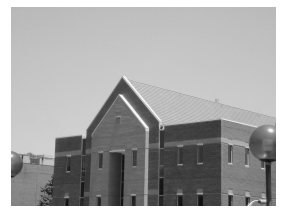

In [84]:
# 실험 영상 다운로드

!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"

--2025-04-13 12:41:16--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824868 (806K) [image/jpeg]
Saving to: ‘school.jpg’

school.jpg          100%[===================>] 805.54K  --.-KB/s    in 0.01s   

2025-04-13 12:41:16 (81.6 MB/s) - ‘school.jpg’ saved [824868/824868]



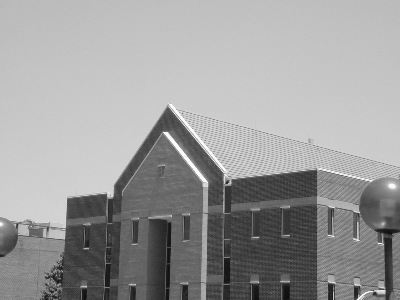


original



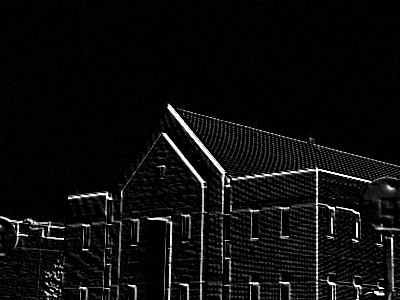


sobel_45



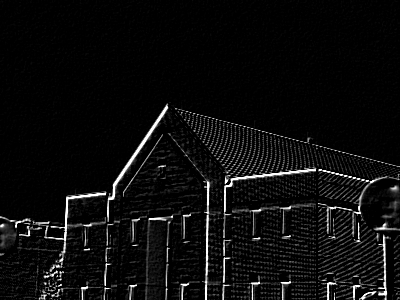


sobel_negative_45



In [85]:
# 이미지 불러오기 (흑백)
img = cv2.imread('/content/school.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

# 대각선용 변형된 Sobel 마스크
# 45도 방향
# 결과 : 왼쪽 위에서 오른쪽 아래로 밝기 변화가 큰 엣지 검출
sobel_45 = np.array([
    [ 0,  1,  2],
    [-1,  0,  1],
    [-2, -1,  0]
], dtype=np.float32)

# -45도 방향
# 결과 : 오른쪽 위에서 왼쪽 아래로 밝기 변화가 큰 엣지 검출
sobel_negative_45 = np.array([
    [ 2,  1,  0],
    [ 1,  0, -1],
    [ 0, -1, -2]
], dtype=np.float32)

edge_45 = cv2.filter2D(img, -1, sobel_45)
edge_negative_45 = cv2.filter2D(img, -1, sobel_negative_45)

cv2_imshow(img)
print("\noriginal\n")
cv2_imshow(edge_45)
print("\nsobel_45\n")
cv2_imshow(edge_negative_45)
print("\nsobel_negative_45\n")


## HW# 2-5
왼족의 지문 영상을 오른쪽 영상과 같이 개선해보세요. 수업시간에 배운 방법을 기본적으로 적용해보고, 더 좋은 방법이 있으면 해당 방법도 적용하고 결과를 분석해 보세요

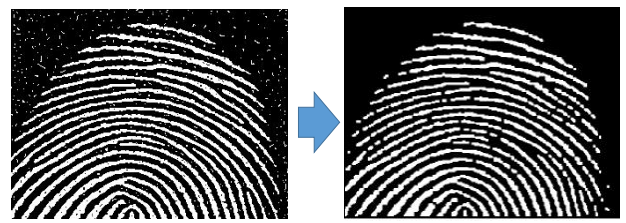

In [86]:
#실험 영상 다운

!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg'

--2025-04-13 12:41:16--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘finger.jpg.1’

finger.jpg.1        100%[===================>]  71.73K  --.-KB/s    in 0.003s  

2025-04-13 12:41:16 (25.8 MB/s) - ‘finger.jpg.1’ saved [73452/73452]



Original -> Open -> Close : 수업 시간에 배운 방법


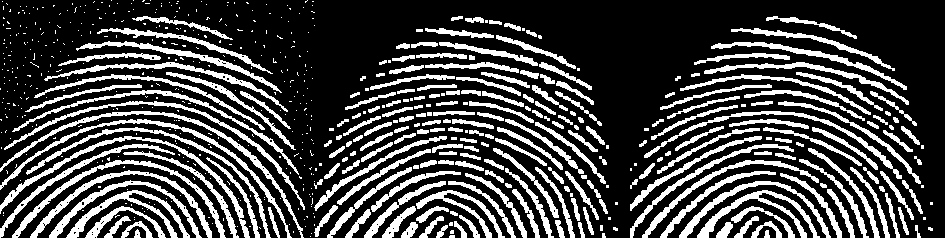

In [87]:
# 이미지 로드
img = cv2.imread('finger.jpg', cv2.IMREAD_GRAYSCALE)

# 1. 이미지 이진화
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 2. 커널 정의 (구조 요소,structing Element) - 사각형
kernel = np.uint8([[0,0,0,0,0],
            [0,1, 1,1,0],
            [0,1,1,1,0],
            [0,1,1,1,0],
            [0,0,0,0,0]])

# 3. 모폴로지 연산 수행
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel) # open 연산 수행 -> 작은 노이즈나 돌출부 제거
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel) # open 연산 결과를 close 연산 수행 -> 객체의 외곽을 부드럽게하고, 작은 구멍이나 틈을 매운다.
result_1 = np.hstack((binary, opened, closed)) # 결과 시각화

print("Original -> Open -> Close : 수업 시간에 배운 방법")
cv2_imshow(result_1)


## HW# 2-6

다음 영상에서 원하는 선분을 없애 보시고, 어떻게 했는지 분석하세요.

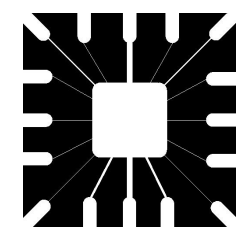

In [88]:
# 실험 영상 다운로드

!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif'

--2025-04-13 12:41:16--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [image/tiff]
Saving to: ‘Fig0905(a)(wirebond-mask).tif.1’

Fig0905(a)(wirebond 100%[===================>]  29.39K  --.-KB/s    in 0s      

2025-04-13 12:41:17 (91.2 MB/s) - ‘Fig0905(a)(wirebond-mask).tif.1’ saved [30092/30092]



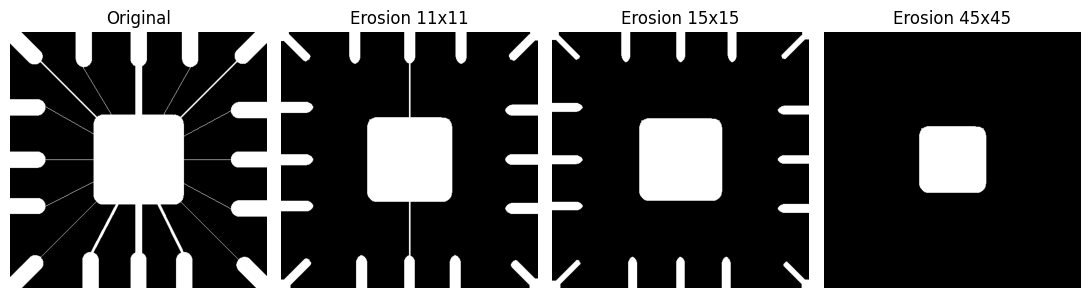

In [89]:
# 원본 바이너리 이미지 불러오기
img = cv2.imread('/content/Fig0905(a)(wirebond-mask).tif', cv2.IMREAD_GRAYSCALE)

# Thresholding (바이너리화)
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)

# Structuring Elements
sizes = [11, 15, 45] # 구조 요소(kernel 혹은 structuring element)의 크기 배열
results = [binary] # 결과 배열

# 침식(Erosion) 적용
# 구조 요소의 크기에 따라서 원본 이미지를 침식(Erosion) 모폴로지 연산을 수행한다.
for size in sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size)) # 구조 요소 생성 (size x size)
    eroded = cv2.erode(binary, kernel) # Erison 연산 수행
    results.append(eroded) # 결과 리스트 추가

# 결과 시각화
titles = ['Original', 'Erosion 11x11', 'Erosion 15x15', 'Erosion 45x45']
plt.figure(figsize=(11, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(results[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## HW# 2-7

아래의 Edge 검출 알고리즘 사용하여 edge를 검출하고, 각각 결과가
어떻게 다른 지 비교하세요.

*   Sobel
*   Laplacian
*   Canny
*   Morphological Gradient

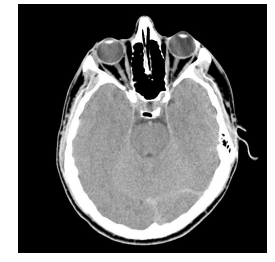

In [90]:
# 실험 영상 다운
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif'

--2025-04-13 12:41:17--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘Fig0939(a)(headCT-Vandy).tif.1’

Fig0939(a)(headCT-V 100%[===================>] 256.59K  --.-KB/s    in 0.005s  

2025-04-13 12:41:17 (47.7 MB/s) - ‘Fig0939(a)(headCT-Vandy).tif.1’ saved [262750/262750]



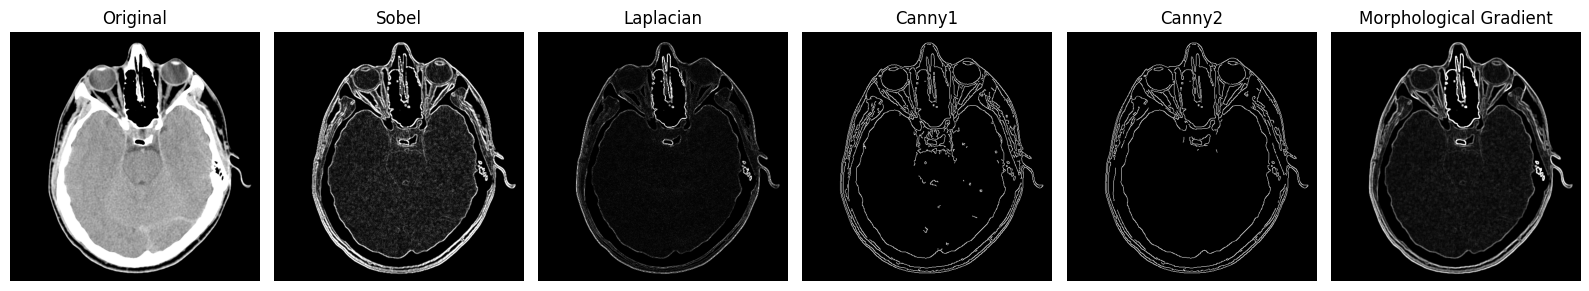

In [91]:
# 이미지 불러오기 (흑백)
img = cv2.imread('/content/Fig0939(a)(headCT-Vandy).tif', cv2.IMREAD_GRAYSCALE)

# 1. Sobel Edge
# 1차 미분 기반의 경계선 검출
# 전체적으로 세밀한 구조가 모두 검출된다.
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # 수평(x) 방향 경계
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # 수직(y) 방향 경계
edge_strength = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5,cv2.convertScaleAbs(sobel_y), 0.5, 0)  # 경계 강도

# 2. Laplacian Edge
# 2차 미분 기반의 경계선 검출
# Sobel 보다 노이즈는 덜하지만, 엣지가 약하고 흐릿함, 내부 조직 구조는 잘 드러나지 않는다.
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# 3. Canny Edge
# 정교하고 선명한 엣지를 추출 하지만 파라미터 조정이 필요하다.
canny1 = cv2.Canny(img, 100, 200)
canny2 = cv2.Canny(img, 200, 300)

# 4. Morphological Gradient
# 뇌의 엣지가 부드럽게 강조되어 있다.
# 팽창 연산과 침식 연산을 수행할 결과를 차 연산해서 경계를 추출함으로써 좋은 엣지 추출 결과가 나온다.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# 결과 시각화
titles = ['Original', 'Sobel', 'Laplacian', 'Canny1', 'Canny2', 'Morphological Gradient']
images = [img, edge_strength, laplacian, canny1, canny2, morph_gradient]
plt.figure(figsize=(16, 6))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## HW# 2-8

아래의 알고리즘을 사용하여 노이즈라 생각되는 영역을 지우고, 각각 결과가 어떻게 다른지 비교 분석하세요

*   Morphological Smoothing
*   Smoothing Filter

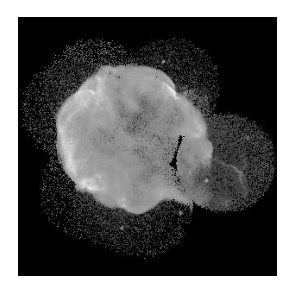

In [92]:
# 실험 영상 다운

!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif'

--2025-04-13 12:41:18--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321002 (313K) [image/tiff]
Saving to: ‘Fig0938(a)(cygnusloop_Xray_original).tif.1’

Fig0938(a)(cygnuslo 100%[===================>] 313.48K  --.-KB/s    in 0.004s  

2025-04-13 12:41:18 (68.6 MB/s) - ‘Fig0938(a)(cygnusloop_Xray_original).tif.1’ saved [321002/321002]



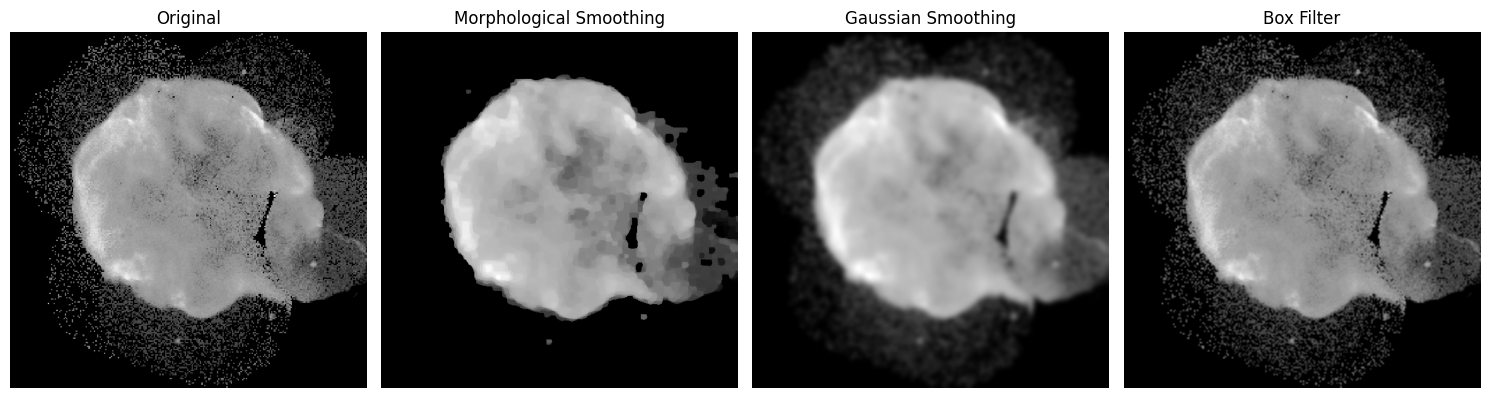

In [93]:
# 이미지 불러오기 (흑백)
img = cv2.imread('/content/Fig0938(a)(cygnusloop_Xray_original).tif', cv2.IMREAD_GRAYSCALE)

# Morphological Smoothing : Open 연산 후 Close 연산 수행
# 작은 점 노이즈가 대부분 제거되었고, 전체적은 윤곽도 매끄러워졌다.
# 하지만 큰 커널을 사용해서 블록처럼 계단 현상이 생겼다
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
morph_smooth = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
morph_smooth = cv2.morphologyEx(morph_smooth, cv2.MORPH_CLOSE, kernel)

# Smoothing Filter (Gaussian Blur & Box Filter)
# - Gaussian Blur : 노이즈가 전체적으로 흐려져서 약해졌다. 하지만 완전히 제거되지 않았음
# - Box Filter : 노이즈가 부분적으로 감소, 하지만 완전히 제거되지 않았음
gaussian = cv2.GaussianBlur(img, (0, 0), 4)
box_kernel = np.ones((3, 3), dtype=np.float32) / 9.0
box = cv2.filter2D(img, -1, box_kernel)

# 결과 시각화
# 결과적으로 Morphological Smoothing이 점 노이즈 제거에 효과적임을 볼 수 있다.
titles = ['Original', 'Morphological Smoothing', 'Gaussian Smoothing', 'Box Filter']
images = [img, morph_smooth, gaussian, box]

plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## HW# 2-9

다음 영상을 이진화하되, 수업시간에 배운 2가지 방법을 모두 써보고, 각각의 결과에 대해 분석하세요.

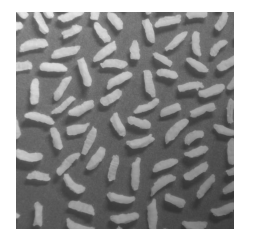

In [94]:
# 실험 영상 다운

!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif'

--2025-04-13 12:41:20--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360574 (352K) [image/tiff]
Saving to: ‘Fig0940(a)(rice_image_with_intensity_gradient).tif.1’

Fig0940(a)(rice_ima 100%[===================>] 352.12K  --.-KB/s    in 0.005s  

2025-04-13 12:41:20 (65.8 MB/s) - ‘Fig0940(a)(rice_image_with_intensity_gradient).tif.1’ saved [360574/360574]



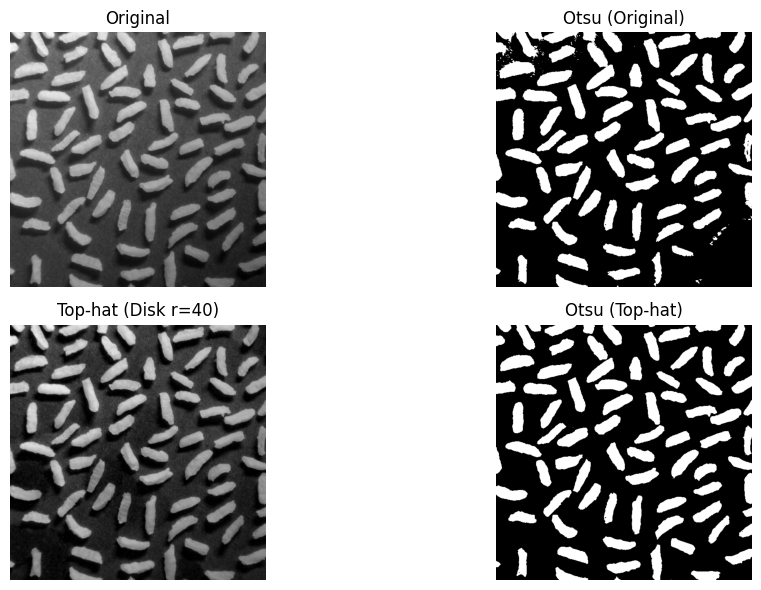

In [95]:
# 이미지 로
img = cv2.imread('/content/Fig0940(a)(rice_image_with_intensity_gradient).tif', cv2.IMREAD_GRAYSCALE)

# 디스크(원형) 구조요소 생성: 반지름 40
radius = 40
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius*2, radius*2))

# Top-hat 변환
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# 원본 영상 Otsu 이진화
# 전체적으로 쌀알이 잘 보이긴 하지만, 어두운 그림자가 있는 쌀알은 잘 이진화가 되지 않았다.
_, otsu_original = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Top-hat 연산을 수행한 영상을 Otsu 이진화
# Top-hat 변환을 통해 밝은 부분이 강조되었고, 결과적으로 이진화 영상 또한 쌀알이 정확히 추출되었다.
_, otsu_tophat = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# 결과 시각화
# 결과적으로 Top-hat 전처리 후 Otsu 이진화는 밝은 객체가 균일하지 않은 배경에 있을 때 훨씬 더 효과적인 이진화 성능을 보여준다.
titles = ['Original', "Otsu (Original)", 'Top-hat (Disk r=40)', "Otsu (Top-hat)"]
images = [img, otsu_original, tophat, otsu_tophat]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## HW# 2-10

다음 영상을 Morphology를 적용하여 오른쪽과 같이 분할하세요


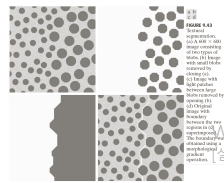

In [96]:
# 실험 영상 다운

!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif'

--2025-04-13 12:41:20--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360678 (352K) [image/tiff]
Saving to: ‘Fig0943(a)(dark_blobs_on_light_background).tif.1’

Fig0943(a)(dark_blo 100%[===================>] 352.22K  --.-KB/s    in 0.007s  

2025-04-13 12:41:20 (51.3 MB/s) - ‘Fig0943(a)(dark_blobs_on_light_background).tif.1’ saved [360678/360678]



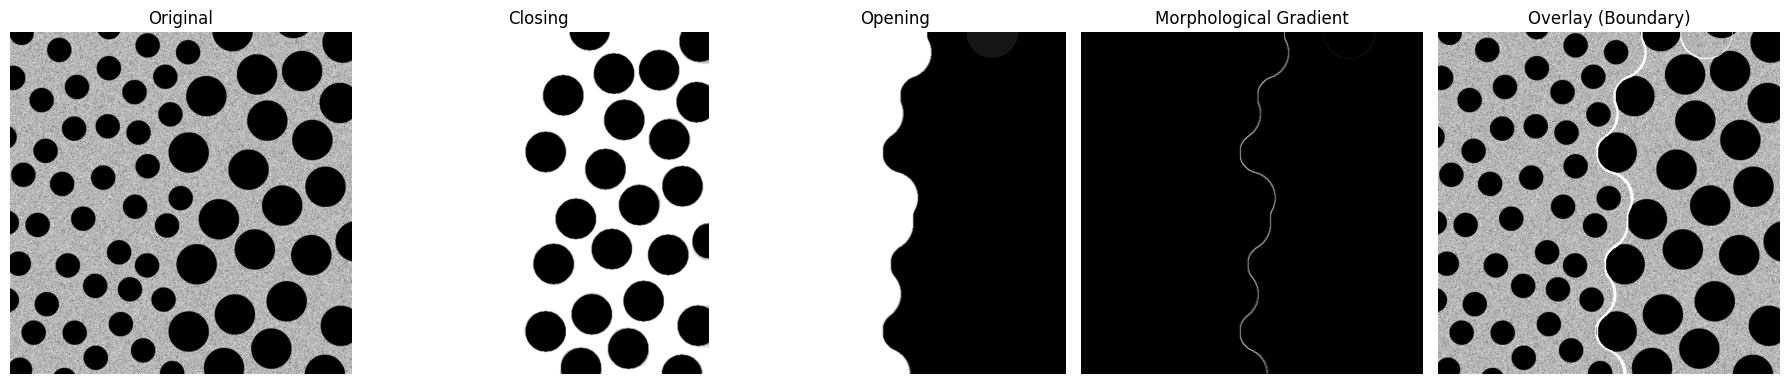

In [97]:
# 1. 이미지 불러오기 (Grayscale)
img = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)

# 커널 생성
kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55, 55)) # 크기 55
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (90, 90))  # 크기 90
kernel_gradient = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))   # 크기 2

# 작은 얼룩 제거
# 작은 얼룩들보다 더 큰 구조 요소로 닫힘 연산 수행
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_close)

# 얼룩들 사이의 밝은 패치 제거
# 얼룩들간의 간격에 비해 큰 구조 요소를 적용해서 열림 연산 수행
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_open)

# Morphological Gradient 로 경계 추출
# 작은 커널로 얇은 경계 표현
gradient = cv2.morphologyEx(opened, cv2.MORPH_GRADIENT, kernel_gradient)

# 원본에 경계 합성
overlay = img.copy()
overlay[gradient > 0] = 255  # 경계는 흰색으로 표시

# 시각화

titles = ['Original', 'Closing', 'Opening', 'Morphological Gradient', 'Overlay (Boundary)']
images = [img, closed, opened, gradient, overlay]

plt.figure(figsize=(18, 8))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
